In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from glob import glob
import os
from pathlib import Path
from tqdm import tqdm
import cvfile
%matplotlib inline

## データのpathをDataFrameにする
#### カラム：　FilePathImage, FileName, FilePathMask

In [2]:
df = cvfile.get_df_all()
df = df.drop(df.index[[3, 4]])
df.reset_index(drop=True)

,FilePathImages,FileName,FilePathMask
0,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
1,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
2,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
3,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
4,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
5,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
6,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz


## NifTiデータをNumpy Arrayとしてロードする
## マスクデータをRGBにする
## CTデータをHUからグレースケールに変換する

In [3]:
index = 2
volume = cvfile.load_nifti(df.iloc[index]['FilePathImages'])
mask = cvfile.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = cvfile.label_color(mask)
volume_gray = cvfile.hu_to_gray(volume)

## CTとアノテーションマスクをOverlayする

In [4]:
overlayed = cvfile.overlay(volume_gray, mask, mask_color, alpha=0.7)

### 各スライスを並べて表示する
### 各スライスに情報を表示する

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


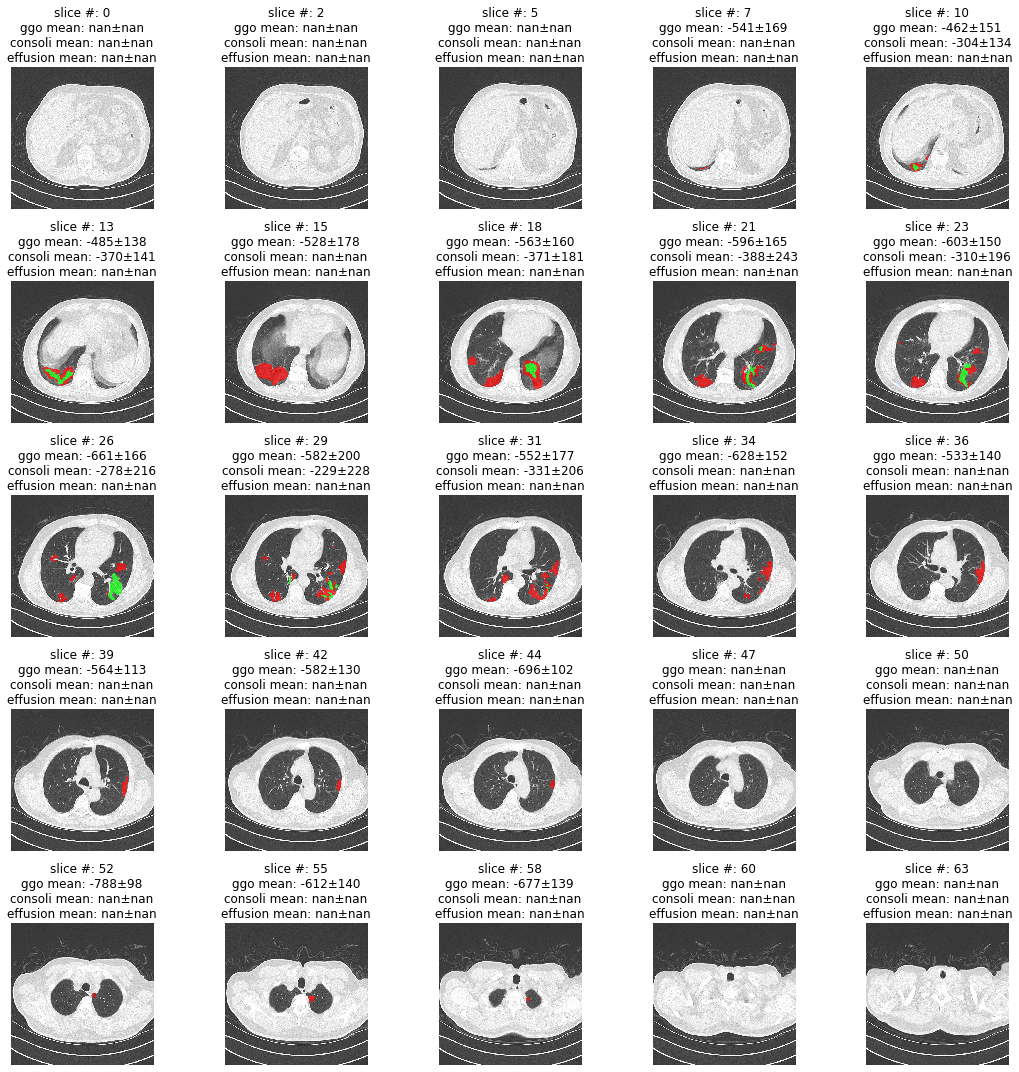

In [12]:
cvfile.vis_overlay(overlayed, volume, mask, cols = 5, display_num = 25)